In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import sklearn

## First i Access all the csv file :

In [2]:
data=pd.read_csv(r"C:\Users\amarn\movie_data\links.csv")

In [3]:
data

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [4]:
data1=pd.read_csv(r"C:\Users\amarn\movie_data\movies.csv")

In [5]:
data1

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [6]:
data2=pd.read_csv(r"C:\Users\amarn\movie_data\ratings.csv")

In [7]:
data2

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [8]:
data3=pd.read_csv(r"C:\Users\amarn\movie_data\tags.csv")

In [9]:
data3

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


## 1. Download the data from the above link. How many ".csv" files are available in the dataset?:

In [10]:
# 4

## 2. What is the shape of "movies.csv"?


In [11]:
data1.shape

(9742, 3)

## 3. What is the shape of "ratings.csv"?


In [12]:
data2.shape

(100836, 4)

## 4.How many unique "userId" are available in "ratings.csv"?


In [13]:
un=data2["userId"].nunique()
un

610

## 5.Which movie has recieved maximum number of user ratings?
*

In [14]:
rat=data2['movieId'].value_counts()

max_rat=rat.idxmax()

movie_name=data1[data1['movieId']==max_rat]
print(movie_name['title'].tolist())

['Forrest Gump (1994)']


## 6. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [15]:
movie_name= "Matrix, The (1999)" 
movie_id = data1[data1['title'] == movie_name]['movieId'].iloc[0]
movie_tg = data3[data3['movieId'] == movie_id]['tag'].tolist()
print(movie_tg)

['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


## 7. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [16]:
movie_name="Terminator 2: Judgment Day (1991)"
rt_mv = pd.merge(data2, data1, on='movieId')
rt_mv

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [17]:
movie_ratings = rt_mv[rt_mv['title'] == movie_name]['rating']
movie_ratings

26714    3.0
26715    3.0
26716    2.5
26717    4.0
26718    5.0
        ... 
26933    3.5
26934    4.0
26935    3.0
26936    3.0
26937    5.0
Name: rating, Length: 224, dtype: float64

In [18]:
average_rating = movie_ratings.mean()

In [19]:
average_rating

3.970982142857143

## 9. How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

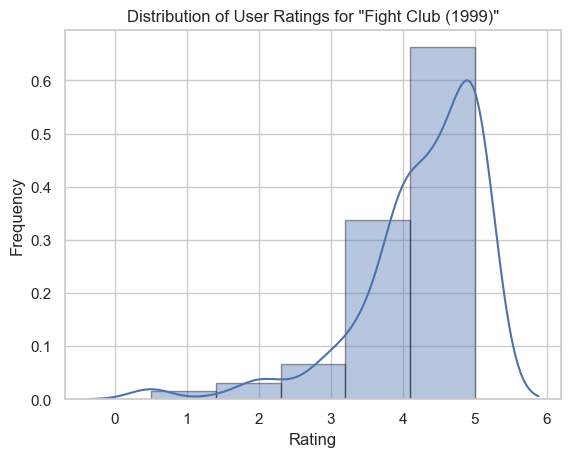

In [20]:
movie_name="Fight Club (1999)"
movie_ratings = rt_mv[rt_mv['title'] == movie_name]['rating']
sns.set(style="whitegrid")
sns.distplot(movie_ratings, kde=True, bins=5, hist_kws={"edgecolor": "black"})
plt.title(f'Distribution of User Ratings for "{movie_name}"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## 🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [21]:
df=pd.merge(data,data1)

In [22]:
df

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9737,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,6397426,479308.0,Flint (2017),Drama
9740,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [23]:
df1=pd.merge(df,data2)

In [24]:
df1

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...,...,...
100831,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,6397426,479308.0,Flint (2017),Drama,184,3.5,1537109805
100834,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [25]:
df1

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...,...,...
100831,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,6397426,479308.0,Flint (2017),Drama,184,3.5,1537109805
100834,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [26]:
grouped_ratings = df1.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']


In [27]:
grouped_ratings

,movieId,rating_count,rating_mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [28]:
merged_df = pd.merge(data1, grouped_ratings, on='movieId', how='inner')
filtered_df = merged_df[merged_df['rating_count'] > 50]


In [29]:
filtered_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


## ## Which movie is the most popular based on  average user ratings?
*
## Answer this question only after applying the above mentioned "Mandatory Operration"

In [30]:
most_popular_movie = filtered_df.loc[filtered_df['rating_mean'].idxmax()
print("Most Popular Movie:")
print(most_popular_movie[['title', 'rating_mean']])

SyntaxError: '[' was never closed (1826338707.py, line 1)

## Select all the correct options which comes under top 5 popular movies based on number of user ratings.
*
##### Answer this question only after applying the above mentioned "Mandatory Operration".

In [31]:
top_movies_by_ratings = filtered_df.sort_values(by='rating_count', ascending=False)
top_5_movies = top_movies_by_ratings.head(5)
print("Top 5 Popular Movies based on Number of User Ratings:")
print(top_5_movies[['title', 'rating_count']])

Top 5 Popular Movies based on Number of User Ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?
*
#### Answer this question only after applying the above mentioned "Mandatory Operration".

In [32]:
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]
print("Third Most Popular Sci-Fi Movie based on Number of User Ratings:")
print(third_most_popular_sci_fi_movie[['title', 'rating_count']])

Third Most Popular Sci-Fi Movie based on Number of User Ratings:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


### Web Scraping: 

#### 🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

In [33]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan

### Mention the movieId of the movie which has the highest IMDB rating.


In [ ]:
highest_rated_movie = filtered_df.loc[filtered_df['imdb_data'].apply(lambda x: float(x['rating']) if pd.notna(x['rating']) else 0).idxmax()]
highest_rated_movie
print("Movie with the highest IMDb rating:")

## Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating?

In [ ]:
sci_fi_df = filtered_df[filtered_df['genres'].apply(lambda x: 'Sci-Fi' in x)]
highest_rated_sci_fi_movie = sci_fi_df.loc[sci_fi_df['imdb_data'].apply(lambda x: float(x['rating']) if pd.notna(x['rating']) else 0).idxmax()]
